In [4]:
def disp(fen):
    board = chess.Board(fen)
    return board
abs_path="d:\OneDrive - Indian Institute of Technology Bombay\Study\Events and Activities\Year 2\Seasons of Coding 23\soc23-DeepCarlsen"
import chess


In [8]:
with open(abs_path+"\dataset\positions.txt", "r") as f:
    lines = f.readlines()
positions = [line[:-1] for line in lines[9::5]]
positions

['r2qkb1r/pp2nppp/3p4/2pNN1B1/2BnP3/3P4/PPP2PPP/R2bK2R w KQkq - 1 0',
 '1rb4r/pkPp3p/1b1P3n/1Q6/N3Pp2/8/P1P3PP/7K w - - 1 0',
 '4kb1r/p2n1ppp/4q3/4p1B1/4P3/1Q6/PPP2PPP/2KR4 w k - 1 0',
 'r1b2k1r/ppp1bppp/8/1B1Q4/5q2/2P5/PPP2PPP/R3R1K1 w - - 1 0',
 '5rkr/pp2Rp2/1b1p1Pb1/3P2Q1/2n3P1/2p5/P4P2/4R1K1 w - - 1 0',
 '1r1kr3/Nbppn1pp/1b6/8/6Q1/3B1P2/Pq3P1P/3RR1K1 w - - 1 0',
 '5rk1/1p1q2bp/p2pN1p1/2pP2Bn/2P3P1/1P6/P4QKP/5R2 w - - 1 0',
 'r1nk3r/2b2ppp/p3b3/3NN3/Q2P3q/B2B4/P4PPP/4R1K1 w - - 1 0',
 'r4br1/3b1kpp/1q1P4/1pp1RP1N/p7/6Q1/PPB3PP/2KR4 w - - 1 0',
 'r1b2k1r/ppppq3/5N1p/4P2Q/4PP2/1B6/PP5P/n2K2R1 w - - 1 0',
 'r2q1b1r/1pN1n1pp/p1n3k1/4Pb2/2BP4/8/PPP3PP/R1BQ1RK1 w - - 1 0',
 '3q2r1/4n2k/p1p1rBpp/PpPpPp2/1P3P1Q/2P3R1/7P/1R5K w - - 1 0',
 'r2qk2r/pb4pp/1n2Pb2/2B2Q2/p1p5/2P5/2B2PPP/RN2R1K1 w - - 1 0',
 '6k1/pp4p1/2p5/2bp4/8/P5Pb/1P3rrP/2BRRN1K b - - 0 1',
 'rnbqkbn1/ppppp3/7r/6pp/3P1p2/3BP1B1/PPP2PPP/RN1QK1NR w - - 1 0',
 'r2qrb2/p1pn1Qp1/1p4Nk/4PR2/3n4/7N/P5PP/R6K w - - 1 0',
 '8/2r5/1k5p/1p

In [10]:
import pandas as pd
import numpy as np


## Evaluation Function
We find out the percentage of bhich player is winning or losing using evaluation function

In [13]:
evalPos = pd.read_csv(abs_path+"\dataset\chessDataEval.csv")
evalPos = evalPos.sample(1000)
evalPos

,FEN,Evaluation
2334071,1rrq2k1/pp3b2/3p1b2/3Pp1p1/PpP3P1/1P1BP1K1/7Q/...,+2138
4436261,r4rk1/qp4b1/2pNQ2p/5p1P/8/pP1R4/P5P1/1KR5 b - ...,-88
3958013,2q1rrk1/1b2ppbp/p2p1np1/P1pP4/2B1PP2/2NQ3P/1P1...,+133
10046810,2krr3/bpp2pp1/p6p/P1PP4/3P4/5Nqb/1B4P1/R2Q1RK1...,-260
5313315,3rr1k1/pp3pp1/2q4p/2b1P2P/2P3P1/8/PP2Q3/1KBR3R...,0
...,...,...
3227655,rr4k1/4ppbp/qn1p2p1/2pP4/4PP2/1PN2Q1P/P1RB2PK/...,+165
5845050,5rk1/3b1ppp/1p3q2/1P1pp3/Q3n3/1N2P3/4B1PP/3NK2...,-139
1578198,8/4p1kp/3p2p1/2pP4/4p3/1r3P2/R5PP/2NnK3 b - - ...,-167
7860587,4rnk1/2nr2pp/p1p1p3/Pp2Pp2/2PP1P2/7R/3B1PKP/R4...,+123


2q1rrk1/1b2ppbp/p2p1np1/P1pP4/2B1PP2/2NQ3P/1P1B2P1/R4RK1 w - - 5 22


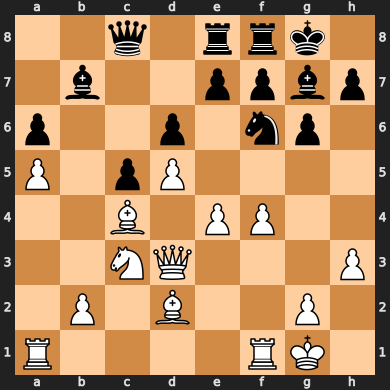

In [75]:
print(evalPos['FEN'].iloc[2])
disp(evalPos['FEN'].iloc[2])

In [42]:
pos_image = evalPos['FEN'].iloc[0]
data = pos_image.split()
pos_data = data[0].split('/')
pos = {'w': {'k': ['-1'], 'q': ['-1'], 'b': ['-1', '-1'], 'n': ['-1', '-1'] ,'r': ['-1', '-1'], 'p': ['-1']*8},
        'b': {'k': ['-1'], 'q': ['-1'], 'b': ['-1', '-1'], 'n': ['-1', '-1'] ,'r': ['-1', '-1'], 'p': ['-1']*8} }
for i in range(8,0,-1):
    col = 'a'
    for st in pos_data[8-i]:
        if '0'<st<'9':
            col = chr(ord(col) + int(st)-1)
        elif(st>='a'):
           pos['b'][st][pos['b'][st].index('-1')] = col+str(i)
        else:
            pos['w'][chr(ord(st)+32)][pos['w'][chr(ord(st)+32)].index('-1')] = col+str(i)
        col = chr(ord(col)+1)
whiteToPlay = data[1]=='w'
castle = {'wk': 'K' in data[2], 'wq': 'Q' in data[2], 'bk': 'k' in data[2], 'bq': 'q' in data[2]}

True

2q1rrk1/1b2ppbp/p2p1np1/P1pP4/2B1PP2/2NQ3P/1P1B2P1/R4RK1 w - - 5 22


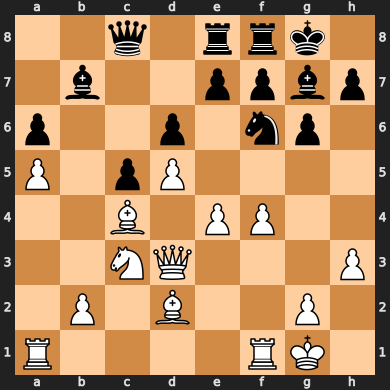

In [5]:
temp = "2q1rrk1/1b2ppbp/p2p1np1/P1pP4/2B1PP2/2NQ3P/1P1B2P1/R4RK1 w - - 5 22"
print(temp)
disp(temp)

r4rk1/1p1b2p1/2nq3p/2b1pp2/p1Pp4/P2P1NP1/1B2PPBP/2Q1RRK1 b - - 5 22


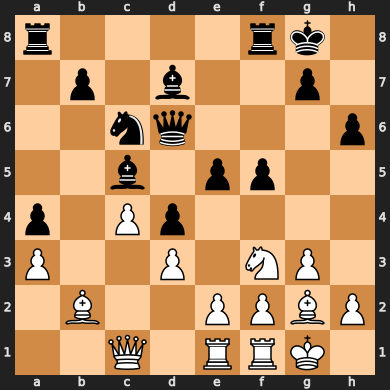

In [8]:
temp2 = chess.Board(temp).mirror()
print(temp2.fen())
temp2

In [71]:
b = chess.Board(evalPos['FEN'].iloc[0])
board = b
piece = chess.Board.piece_map(board)
piece_rev = {val: key for (key,val) in piece.items()}
k=chess.Piece.from_symbol('k')
piece_rev

{Piece.from_symbol('k'): 62,
 Piece.from_symbol('q'): 59,
 Piece.from_symbol('r'): 57,
 Piece.from_symbol('b'): 45,
 Piece.from_symbol('p'): 25,
 Piece.from_symbol('P'): 17,
 Piece.from_symbol('K'): 22,
 Piece.from_symbol('B'): 19,
 Piece.from_symbol('Q'): 15,
 Piece.from_symbol('R'): 4}

In [ ]:
def square(loc):
    moves.to

In [54]:
moves = list(chess.Board("1rrq2k1/pp3b2/3p1b2/3Pp1p1/PpP3P1/1P1BP1K1/7Q/4RR2 w - - 0 30").legal_moves)
moveB = []
moveQ = []
moveR = []
print(moves[0], moves[0].to_square, moves[0].from_square)

g3h3 23 22
